In [302]:
import os 
import sys
from pathlib import Path
from bs4 import BeautifulSoup
import json
import requests
import time
from datetime import datetime
import pandas as pd
import numpy as np 

hoops_dir = Path("/Users/danielfriedman/Desktop/hoops")
data_dir = hoops_dir / "data"
lines_dir = data_dir / "lines"
sys.path.append(hoops_dir.as_posix())

In [283]:
url = "https://sportsbook.draftkings.com/leagues/basketball/88670846" # TODO: does that URL change with the date?


In [665]:
import os 
import sys
from pathlib import Path
import argparse
from bs4 import BeautifulSoup
import json
import requests
import time
from datetime import datetime
import pandas as pd
import numpy as np 

# hoops_dir = Path(os.path.abspath(__file__)).parent.parent
data_dir = hoops_dir / "data"
lines_dir = data_dir / "lines"
sys.path.append(hoops_dir.as_posix())

def track_lines(url, sleep=1, max_iter=1000):
    all_lines = pd.DataFrame(columns=['home', 'vis', 'home_score', 'vis_score', 'quarter', 'time', 'home_mline', 'vis_mline'])
    start_time = datetime.now().strftime("%m-%d-%Y_%H:%M:%S")
    
    for i in range(max_iter):
        ## Parse the page
        print("X")
        try:
            page = requests.get(url)
            soup = BeautifulSoup(page.content, "html.parser")
        except:
            time.sleep(300)
            page = requests.get(url)
            soup = BeautifulSoup(page.content, "html.parser")            
        print("Y")
        ## Get all Lines
        lines = soup.find_all("tbody", class_="sportsbook-table__body")[0].find_all("tr")

        ## Get the teams
        teams = [line.find("div", class_="event-cell__name-text").text.split(" ")[0] for line in lines]
        
        ## Get the time
        clocks = [line.find("div", class_='event-cell__clock') for line in lines[::2]]
        times = [clock.find_all("span")[0].string if clock else None for clock in clocks]
        quarters = [clock.find_all("span")[1].string[0] if clock else None for clock in clocks]

        ## Get the scores
        scores = [line.find("span", class_="event-cell__score") for line in lines]
        scores = [score.text if score else None for score in scores]

        ## Get the lines
        mlines = [line.find("span", class_="sportsbook-odds american no-margin default-color") for line in lines]        
        mlines = [line.text.replace("+", "") if line else None for line in mlines]

        ## Update lines
        iter_lines = pd.DataFrame(columns=['home', 'vis', 'home_score', 'vis_score', 'quarter', 'time', 'home_mline', 'vis_mline'])
        iter_lines['home'] = teams[1::2]
        iter_lines['vis'] = teams[::2]
        iter_lines['home_score'] = scores[1::2]
        iter_lines['vis_score'] = scores[::2]
        iter_lines['quarter'] = quarters
        iter_lines['time'] = times
        iter_lines['home_mline'] = mlines[1::2]
        iter_lines['vis_mline'] = mlines[::2]        
        all_lines = pd.concat([all_lines, iter_lines]).drop_duplicates()
#         all_lines.to_csv(lines_dir / (start_time + ".csv"), index=False)
        
        ## Break
        if len(lines) == 0:
            break
            
        ## Sleep
        time.sleep(sleep)
        
    
    ## Return
    return all_lines


## Run it
url = "https://sportsbook.draftkings.com/leagues/basketball/88670846"
sleep = 1
max_iter = 3
lines = track_lines(url, sleep=sleep, max_iter=max_iter)
lines


X
Y
<built-in method now of type object at 0x10a3c1b68>
X
Y
<built-in method now of type object at 0x10a3c1b68>
X
Y
<built-in method now of type object at 0x10a3c1b68>


,home,vis,home_score,vis_score,quarter,time,home_mline,vis_mline
0,NY,PHI,107,115,4,3:29,1100,-2800
1,PHO,UTA,None,None,None,None,135,-155
2,IND,BOS,None,None,None,None,320,-425
0,NY,PHI,109,122,4,1:28,1300,-3500


In [57]:
url = "https://sportsbook.draftkings.com/event/180233664"
for i in range(1000):
    page = requests.get(url)
    soup = BeautifulSoup(page.content, "html.parser")
    time_left = soup.find_all(class_="event-cell__time")[0].text
    quarter = soup.find_all(class_="event-cell__period")[0].text    
    print(time_left, "in the", quarter)
    scores = soup.find_all(class_="live-score-body__row--score")
    scores = scores[4].text, scores[9].text
    print(scores)
    mlines = soup.find_all(class_="sportsbook-odds american no-margin default-color")
    print(mlines[0].text, mlines[1].text)
    print()
    time.sleep(15)


5:08 in the 1st Quarter
('18', '10')
-385 +270

5:08 in the 1st Quarter
('18', '11')
-370 +260

5:08 in the 1st Quarter
('18', '12')
-370 +260

5:06 in the 1st Quarter
('18', '12')
-350 +250

4:35 in the 1st Quarter
('18', '12')
-350 +250

4:21 in the 1st Quarter
('18', '12')
-350 +250

4:21 in the 1st Quarter
('18', '12')
-350 +250

4:21 in the 1st Quarter
('19', '12')
-350 +250

4:21 in the 1st Quarter
('19', '12')
-330 +240

4:06 in the 1st Quarter
('19', '12')
-350 +250

4:04 in the 1st Quarter
('19', '12')
-385 +270

3:54 in the 1st Quarter
('19', '12')
-350 +250

3:54 in the 1st Quarter
('19', '12')
-330 +240

3:37 in the 1st Quarter
('19', '12')
-370 +260

3:19 in the 1st Quarter
('19', '14')
-315 +230

3:17 in the 1st Quarter
('19', '14')
-315 +230

3:11 in the 1st Quarter
('19', '14')
-300 +220

2:53 in the 1st Quarter
('19', '17')
-265 +200

2:34 in the 1st Quarter
('22', '17')
-315 +230

2:24 in the 1st Quarter
('22', '17')
-300 +220

2:24 in the 1st Quarter
('22', '17')
-28

KeyboardInterrupt: 

In [58]:
url = "https://sportsbook.draftkings.com/event/180233664"
for i in range(1000):
    page = requests.get(url)
    soup = BeautifulSoup(page.content, "html.parser")
    time_left = soup.find_all(class_="event-cell__time")[0].text
    quarter = soup.find_all(class_="event-cell__period")[0].text    
    scores = soup.find_all(class_="live-score-body__row--score")
    vis_score, home_score = int(scores[4].text), int(scores[9].text)
    mlines = soup.find_all(class_="sportsbook-odds american no-margin default-color")
    home_line, vis_line = mlines[0].text, mlines[1].text
    mins = 12*(int(quarter[0])-1)
    mins += 11-int(time_left[:3])
    home_lead = home_score - vis_score
    print(f"home_line = {home_line}")
    print(f"vis_line = {vis_line}")
    print(f"home_lead = {home_lead} # {home_score}, {vis_score}")
    print(f"mins = {mins}")
    time.sleep(15)


11:17 in the 2nd Quarter
('33', '30')
-265 +200

11:19 in the 2nd Quarter
('33', '30')
-265 +200

11:10 in the 2nd Quarter
('33', '32')
-265 +200

10:53 in the 2nd Quarter
('36', '32')
-280 +210

10:36 in the 2nd Quarter
('36', '35')
-245 +185

10:21 in the 2nd Quarter
('38', '35')
-265 +200

10:02 in the 2nd Quarter
('38', '35')
-280 +210

10:02 in the 2nd Quarter
('38', '35')
-280 +210

9:45 in the 2nd Quarter
('41', '35')
-350 +250

9:32 in the 2nd Quarter
('41', '35')
-350 +250

9:32 in the 2nd Quarter
('41', '35')
-350 +250

9:32 in the 2nd Quarter
('41', '35')
-330 +240

9:34 in the 2nd Quarter
('41', '35')
-330 +240

9:34 in the 2nd Quarter
('41', '35')
-300 +220

9:24 in the 2nd Quarter
('41', '35')
-350 +250

9:03 in the 2nd Quarter
('41', '35')
-315 +230

8:45 in the 2nd Quarter
('41', '35')
-315 +230

8:39 in the 2nd Quarter
('41', '35')
-300 +220

8:39 in the 2nd Quarter
('41', '36')
-300 +220

8:39 in the 2nd Quarter
('41', '37')
-280 +210

8:33 in the 2nd Quarter
('41', '

KeyboardInterrupt: 

In [64]:
url = "https://sportsbook.draftkings.com/event/180233664"
for i in range(1000):
    page = requests.get(url)
    soup = BeautifulSoup(page.content, "html.parser")
    time_left = soup.find_all(class_="event-cell__time")[0].text
    quarter = soup.find_all(class_="event-cell__period")[0].text    
    scores = soup.find_all(class_="live-score-body__row--score")
    vis_score, home_score = int(scores[4].text), int(scores[9].text)
    mlines = soup.find_all(class_="sportsbook-odds american no-margin default-color")
    vis_line, home_line = mlines[0].text, mlines[1].text
    mins = 12*(int(quarter[0])-1)
    mins += 11-int(time_left[:1])
    home_lead = home_score - vis_score
    print(f"home_line = {home_line}")
    print(f"vis_line = {vis_line}")
    print(f"home_lead = {home_lead} # ({home_score}, {vis_score})")
    print(f"mins = {mins}")
    time.sleep(15)
    print()


home_line = +260
vis_line = -370
home_lead = -6 # (37, 43)
mins = 16

home_line = +240
vis_line = -330
home_lead = -6 # (37, 43)
mins = 16

home_line = +220
vis_line = -300
home_lead = -4 # (39, 43)
mins = 16

home_line = +210
vis_line = -280
home_lead = -4 # (39, 43)
mins = 17

home_line = +220
vis_line = -300
home_lead = -4 # (39, 43)
mins = 17

home_line = +230
vis_line = -315
home_lead = -4 # (39, 43)
mins = 17

home_line = +230
vis_line = -315
home_lead = -4 # (39, 43)
mins = 17

home_line = +230
vis_line = -315
home_lead = -4 # (39, 43)
mins = 17

home_line = +230
vis_line = -315
home_lead = -4 # (39, 43)
mins = 17

home_line = +230
vis_line = -315
home_lead = -4 # (39, 43)
mins = 17

home_line = +230
vis_line = -315
home_lead = -4 # (39, 43)
mins = 17

home_line = +230
vis_line = -315
home_lead = -4 # (39, 43)
mins = 17

home_line = +230
vis_line = -315
home_lead = -4 # (39, 43)
mins = 17

home_line = +230
vis_line = -315
home_lead = -4 # (39, 43)
mins = 17

home_line = +230
vis

KeyboardInterrupt: 

In [69]:
url = "https://sportsbook.draftkings.com/event/180233806"
for i in range(1000):
    page = requests.get(url)
    soup = BeautifulSoup(page.content, "html.parser")
    time_left = soup.find_all(class_="event-cell__time")[0].text
    quarter = soup.find_all(class_="event-cell__period")[0].text    
    scores = soup.find_all(class_="live-score-body__row--score")
    vis_score, home_score = int(scores[4].text), int(scores[9].text)
    mlines = soup.find_all(class_="sportsbook-odds american no-margin default-color")
    vis_line, home_line = mlines[0].text, mlines[1].text
    mins = 12*(int(quarter[0])-1)
    mins += 11-int(time_left[:2].replace(":", ""))
    home_lead = home_score - vis_score
    print(f"home_line = {home_line}")
    print(f"vis_lin e = {vis_line}")
    print(f"home_lead = {home_lead} # ({home_score}, {vis_score})")
    print(f"mins = {mins}")
    time.sleep(60)
    print()


home_line = +900
vis_line = -2000
home_lead = -15 # (52, 67)
mins = 23


KeyboardInterrupt: 

In [333]:
df = pd.read_csv("data/lines/02-25-2022_18:42:54.csv")

In [334]:
df.home.value_counts()

ORL    99
WAS    93
IND    92
CHA    91
NY     74
MIN    45
UTA     2
LA      2
PHO     1
DET     1
Name: home, dtype: int64

In [337]:
df.loc[df['home'] == "ORL"].sort_values(['home_score', 'vis_score']).head(15)

,home,vis,home_score,vis_score,quarter,time,home_mline,vis_mline
18,ORL,HOU,0.0,3.0,1.0,11:42,-140,110
22,ORL,HOU,2.0,3.0,1.0,11:10,-140,110
26,ORL,HOU,2.0,4.0,1.0,11:10,-140,110
30,ORL,HOU,2.0,4.0,1.0,10:47,-140,110
34,ORL,HOU,2.0,6.0,1.0,10:24,-120,-110
38,ORL,HOU,2.0,6.0,1.0,10:19,-135,105
42,ORL,HOU,2.0,6.0,1.0,9:52,-130,100
46,ORL,HOU,2.0,6.0,1.0,9:48,-135,105
50,ORL,HOU,2.0,9.0,1.0,9:31,-135,105
53,ORL,HOU,2.0,9.0,1.0,9:15,-135,105


_____

In [607]:
import seaborn as sns
import matplotlib.pyplot as plt

In [608]:
def sigmoid(x, a=0, b=1):
    return 1/(1+np.exp(-(a + b*x)))

<AxesSubplot:>

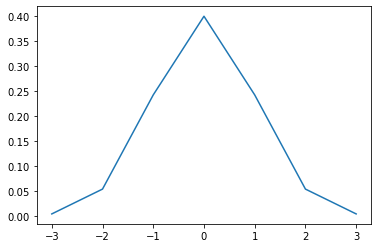

In [640]:
import scipy.stats
from scipy.stats import norm
qa = np.arange(-3, 3.01, 1)
qb = np.arange(-3, 3.01, 1)
a_prior = norm.pdf(qa, loc=0, scale=1)
b_prior = norm.pdf(qb, loc=0, scale=1)
sns.lineplot(x=qa, y=b_prior)


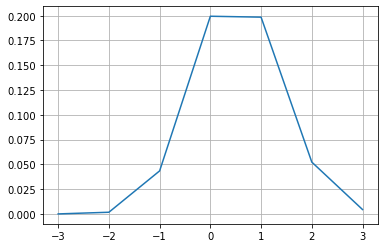

In [641]:
meshgrid = np.meshgrid(qa, qb)
qa_minus_qb = meshgrid[0] - meshgrid[1]
va_probs = sigmoid(qa_minus_qb, b=10) # row represents qb (lowest to highest), col represents qa (lowest to highest)
a_post_over_b = a_prior * va_probs
a_post = (a_post_over_b * b_prior[:, np.newaxis]).sum(0)
fig, ax = plt.subplots()
sns.lineplot(x=qa, y=a_post)
ax.grid()


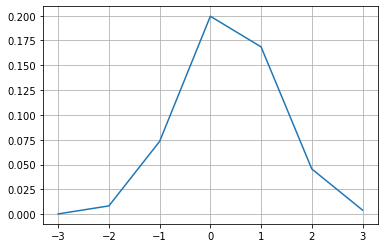

In [642]:
meshgrid = np.meshgrid(qa, qb)
qa_minus_qb = meshgrid[0] - meshgrid[1]
va_probs = sigmoid(qa_minus_qb, b=1) # row represents qb (lowest to highest), col represents qa (lowest to highest)
a_post_over_b = a_prior * va_probs
a_post = (a_post_over_b * b_prior[:, np.newaxis]).sum(0)
fig, ax = plt.subplots()
sns.lineplot(x=qa, y=a_post)
ax.grid()


In [657]:
pd.read_csv("data/lines/02-26-2022_21:03:33.csv")

,home,vis,home_score,vis_score,quarter,time,home_mline,vis_mline
0,ATL,TOR,78.0,62.0,3.0,7:53,-2000,900
1,CHI,MEM,42.0,54.0,2.0,2:16,340,-500
2,MIA,SA,54.0,58.0,2.0,2:42,-385,270
3,CLE,WAS,40.0,42.0,3.0,12:00,-185,150
4,MIL,BKN,23.0,23.0,1.0,1:51,-400,280
...,...,...,...,...,...,...,...,...
109,MIA,SA,61.0,58.0,2.0,0:39,-1450,750
110,MIL,BKN,30.0,25.0,1.0,0:19,-600,385
111,ATL,TOR,89.0,62.0,3.0,5:00,-4500,1500
112,MIA,SA,61.0,58.0,2.0,0:36,-1300,700


array([[0.  , 0.04, 0.21, 0.38, 0.24, 0.05, 0.  ],
       [0.  , 0.03, 0.18, 0.35, 0.23, 0.05, 0.  ],
       [0.  , 0.01, 0.12, 0.29, 0.21, 0.05, 0.  ],
       [0.  , 0.01, 0.07, 0.2 , 0.18, 0.05, 0.  ],
       [0.  , 0.  , 0.03, 0.11, 0.12, 0.04, 0.  ],
       [0.  , 0.  , 0.01, 0.05, 0.07, 0.03, 0.  ],
       [0.  , 0.  , 0.  , 0.02, 0.03, 0.01, 0.  ]])